**Import Libraries**

In [85]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow import keras
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

**Load Dataset**

In [86]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

**Scaling the dataset**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print("First element of X_train is :")
X_train[0]

First element of X_train is :


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
print("First element of Y_train is :")
y_train[0]

First element of Y_train is :


5

In [ ]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (60000, 28, 28)
The shape of y is: (60000,)


**Reshape X_test**

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

**Visualize data**

5


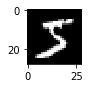

0


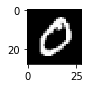

4


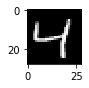

1


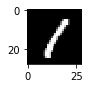

9


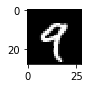

In [ ]:
i=0
while i<5:
    plt.figure(figsize = (10,1))
    print(y_train[i])
    plt.imshow(X_train[i], interpolation='nearest', cmap='gray')
    plt.show()
    i = i+1

**Train CNN Model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2129 - accuracy: 0.9346
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0760 - accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0555 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0438 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0340 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 51s 27m

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0602 - accuracy: 0.9856


[0.06024383381009102, 0.9855999946594238]

In [ ]:
y_predicted_by_model = model.predict(X_test)
y_predicted_by_model[0]

array([1.8047837e-07, 2.7697070e-07, 2.0954683e-06, 4.1477847e-08,
       3.2871236e-07, 9.1318947e-10, 2.8791206e-12, 9.9999583e-01,
       3.6388141e-08, 1.2320490e-06], dtype=float32)

In [ ]:
np.argmax(y_predicted_by_model[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]